In [2]:
library('Matrix')
library('igraph')
library('pracma')

In [3]:
wd<-getwd()
fd<-paste(wd,'/facebook_combined.txt',sep="")
g<-read.graph(fd,directed=FALSE)

In [5]:
g.components <- clusters(g)
gcc.size <- max(g.components$csize)
gcc.size == vcount(g)
diameter(g)

[1] TRUE

[1] 8

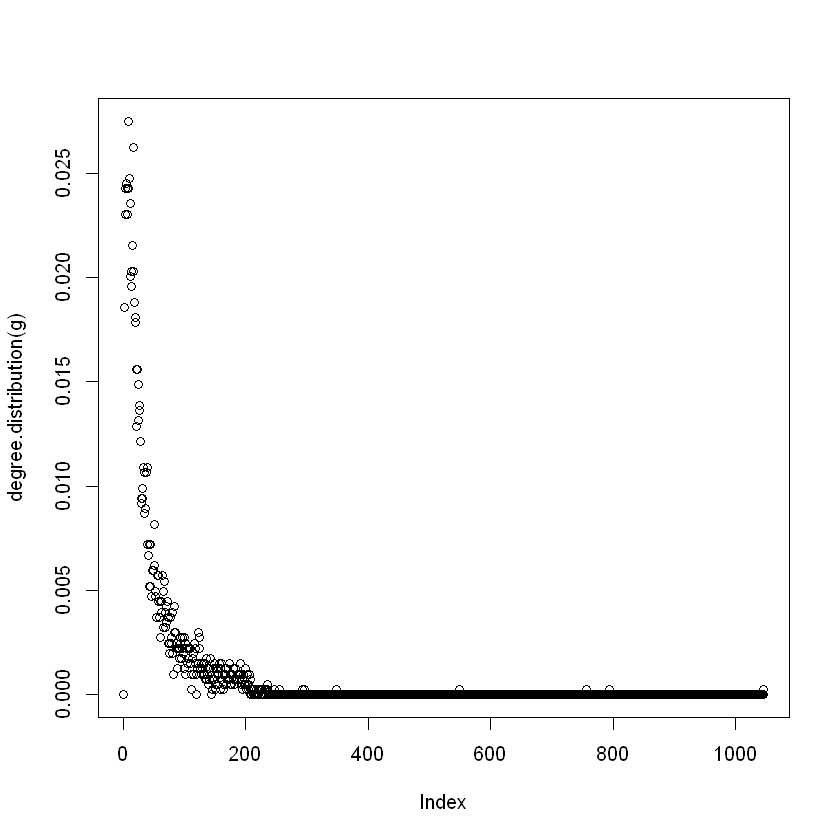

In [13]:
plot(degree.distribution(g))

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"819 y values <= 0 omitted from logarithmic plot"

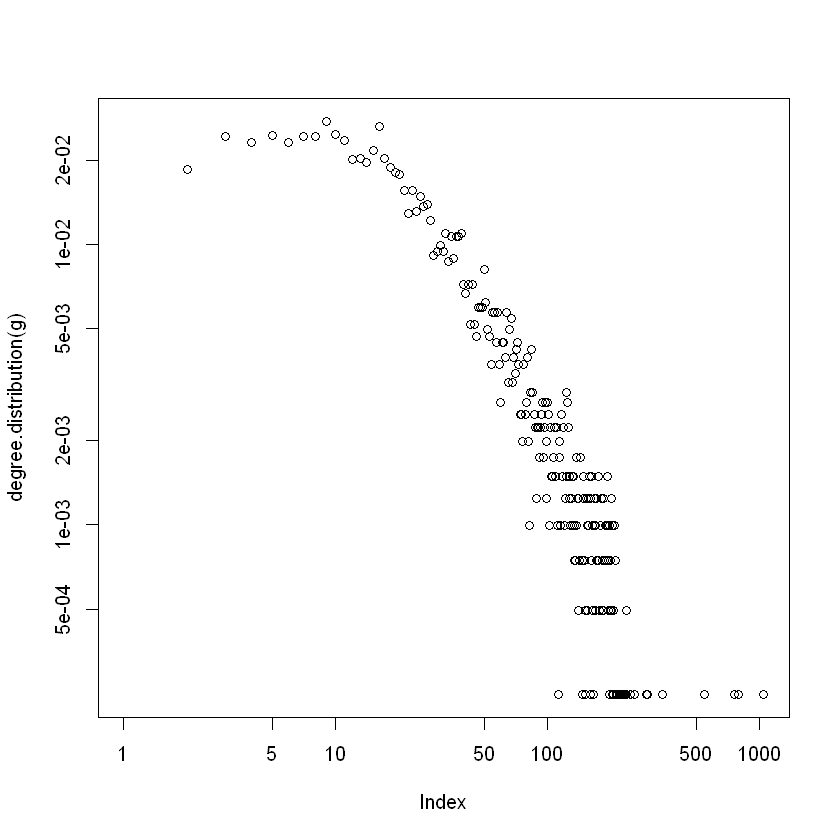

In [14]:
plot(degree.distribution(g),log='xy')

[1] 348

[1] 2866

[1] 2

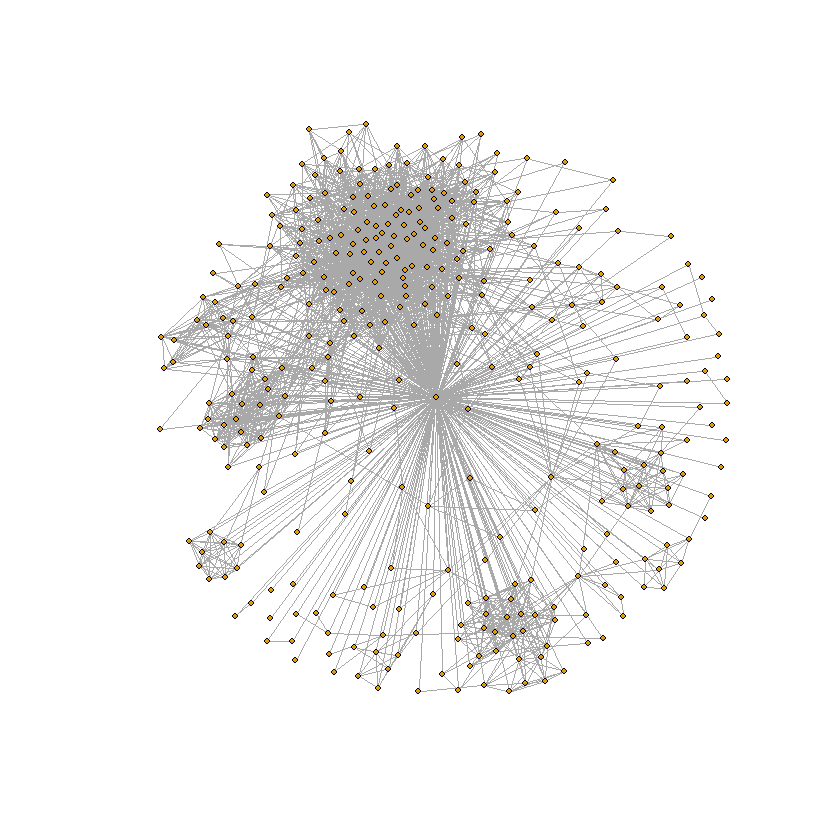

In [4]:
# 1.2
n <- 1 # node we are interested in. 
m <- seq(1,vcount(g))
m <- m[!(m == n |m %in% neighbors(g,n))] #not connected to n
V(g)$vid <- seq(1,vcount(g))
g1 <- delete.vertices(g, m)
plot(g1, vertex.label=V(g1)$vid, vertex.size=2,vertex.label.cex=0.1)

vcount(g1)
ecount(g1)
diameter(g1)

In [4]:
# 1.3
g.degs<-degree(g)
core.degs<-g.degs[g.degs>200]
n_core=length(core.degs)
mean_core=mean(core.degs)
n_core
mean_core

[1] 40

[1] 279.375

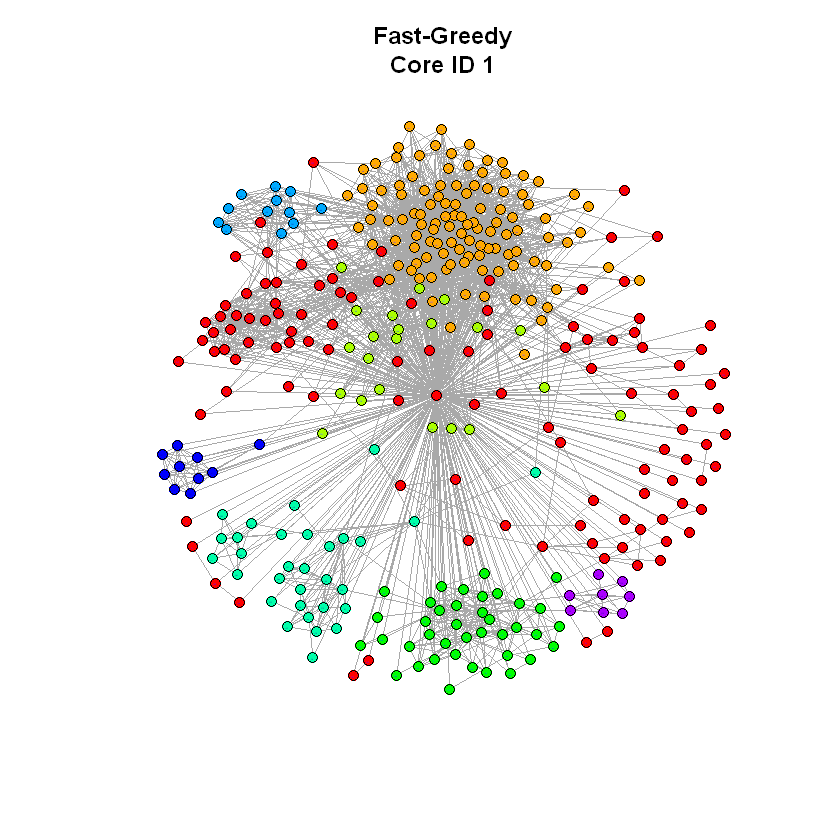

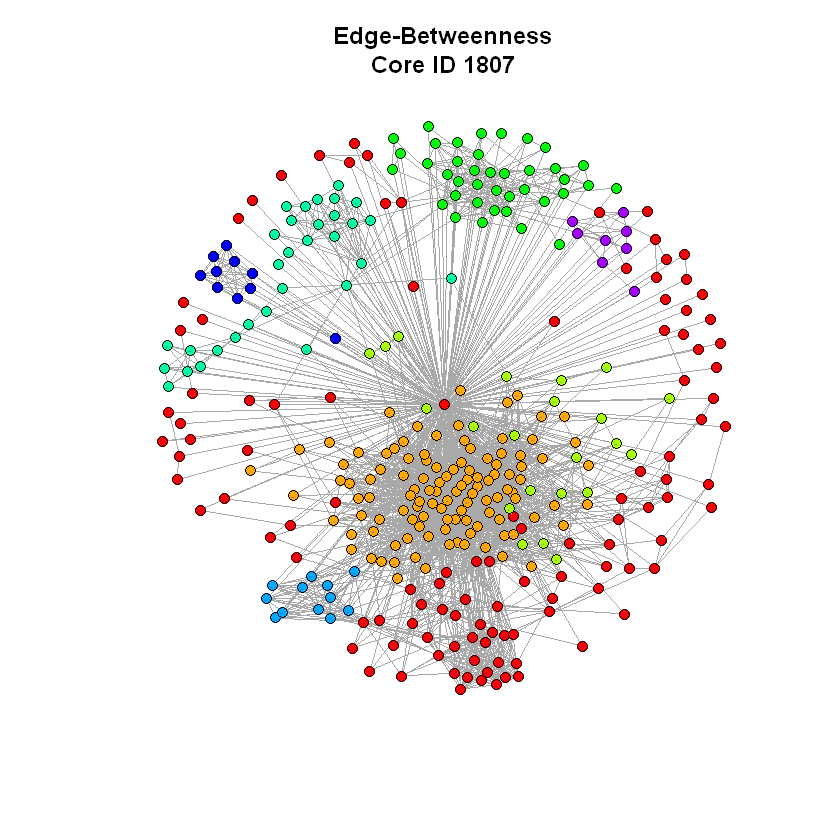

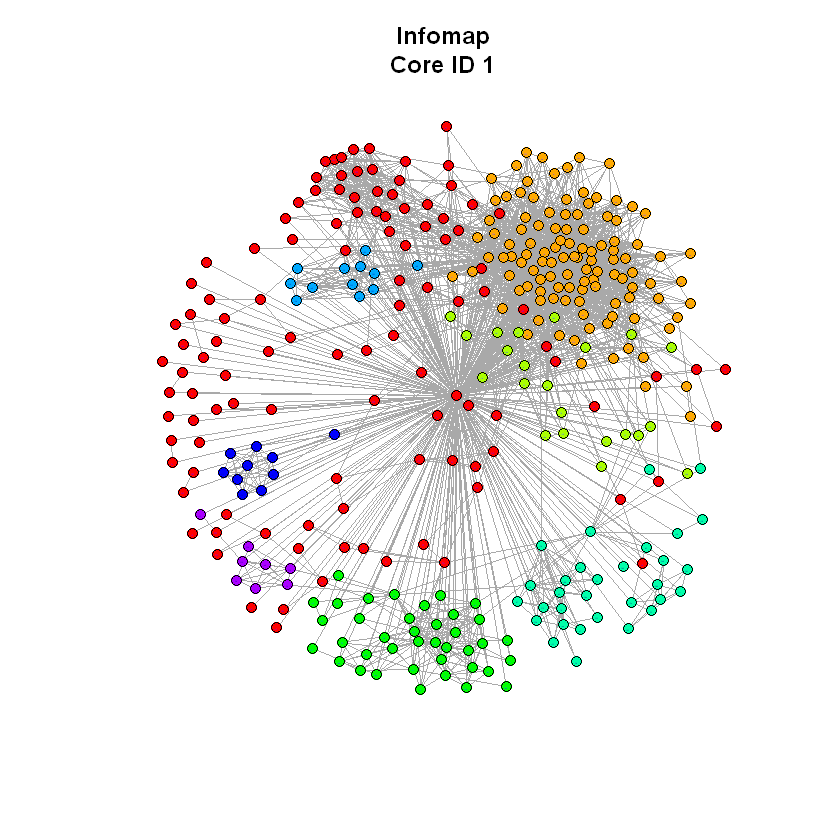

In [16]:
# 1.3.1
core_ids=c(1)#,108,349,484,1087)
fg.mods=numeric(5)
eb.mods=numeric(5)
im.mods=numeric(5)
for (n in core_ids){
    m <- seq(1,vcount(g))
    m <- m[!(m == n |m %in% neighbors(g,n))] #not connected to n
    g1 <- delete.vertices(g, m)
    
    fg<-cluster_fast_greedy(g1)
    fg.mods[match(n,core_ids)]=max(fg$mod)
    colors = rainbow(size(groups(fg))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(g1)$color = nodes_colors[membership(fg)]
    plot(g1,vertex.label=V(g1)$vid, vertex.size=4,vertex.label.cex=0.1,main=paste("Fast-Greedy","\n", "Core ID ",n,sep=""))
    
    eb<-cluster_edge_betweenness(g1)
    eb.mods[match(n,core_ids)]=max(eb$mod)
    colors = rainbow(size(groups(eb))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(g1)$color = nodes_colors[membership(eb)]
    plot(g1,vertex.label=V(g1)$vid, vertex.size=4,vertex.label.cex=0.1,main=paste("Edge-Betweenness","\n", "Core ID ",n,sep=""))
    
    im<-cluster_infomap(g1)
    im.mods[match(n,core_ids)]=max(im$mod)
    colors = rainbow(size(groups(im))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(g1)$color = nodes_colors[membership(im)]
    plot(g1,vertex.label=V(g1)$vid, vertex.size=4,vertex.label.cex=0.1,main=paste("Infomap","\n", "Core ID ",n,sep=""))
}
data.frame("Core ID Node"=core_ids,"Fast-Greedy Modularity"=fg.mods,"Edge-Betweenness Modularity"=eb.mods,"Infomap Modularity"=im.mods)

In [ ]:
# 1.3.2, now omitting core nodes from their personalized networks
core_ids=c(1,108,349,484,1087)
fg.mods=numeric(5)
eb.mods=numeric(5)
im.mods=numeric(5)
for (n in core_ids){
    m <- seq(1,vcount(g))
    m <- m[!(m %in% neighbors(g,n))] #not connected to n
    g1 <- delete.vertices(g, m)
    
    fg<-cluster_fast_greedy(g1)
    fg.mods[match(n,core_ids)]=max(fg$mod)
    colors = rainbow(size(groups(fg))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(g1)$color = nodes_colors[membership(fg)]
    plot(g1,vertex.label=V(g1)$vid, vertex.size=4,vertex.label.cex=0.1,main=paste("Fast-Greedy","\n", "Core ID ",n," Omitted",sep=""))
    
    eb<-cluster_edge_betweenness(g1)
    eb.mods[match(n,core_ids)]=max(eb$mod)
    colors = rainbow(size(groups(eb))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(g1)$color = nodes_colors[membership(eb)]
    plot(g1,vertex.label=V(g1)$vid, vertex.size=4,vertex.label.cex=0.1,main=paste("Edge-Betweenness","\n", "Core ID ",n," Omitted",sep=""))
    
    im<-cluster_infomap(g1)
    im.mods[match(n,core_ids)]=max(im$mod)
    colors = rainbow(size(groups(im))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(g1)$color = nodes_colors[membership(im)]
    plot(g1,vertex.label=V(g1)$vid, vertex.size=4,vertex.label.cex=0.1,main=paste("Infomap","\n", "Core ID ",n," Omitted",sep=""))
}
data.frame("Core ID Node"=core_ids,"Fast-Greedy Modularity"=fg.mods,"Edge-Betweenness Modularity"=eb.mods,"Infomap Modularity"=im.mods)